In [79]:
import pandas as pd
from pprint import pprint
import numpy as np
import hvplot.pandas

In [93]:
perth_house_df = pd.read_csv("../Dataset/perth_housing_price_2021.csv")
perth_house_df


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,9,2018,6164,-32.115900,115.842450,Lakeland Senior High School,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,2,2019,6167,-32.193470,115.859554,Atwell College,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,6,2015,6111,-32.120578,115.993579,Kelmscott Senior High School,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,7,2018,6056,-31.900547,116.038009,Swan View Senior High School,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11,2016,6054,-31.885790,115.947780,Kiara College,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,3,2016,6162,-32.064580,115.751820,Christian Brothers' College,1.430350,49.0
33647,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,2015.0,9600,Stirling Station,4600,2,2017,6061,-31.867055,115.841403,John Septimus Roe Anglican Community School,1.679644,35.0
33648,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,2016.0,9600,Stirling Station,4600,2,2017,6061,-31.866890,115.841418,John Septimus Roe Anglican Community School,1.669159,35.0
33649,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10,2016,6064,-31.839680,115.842410,Girrawheen Senior High School,0.358494,NaN


## Cleaning data for machine learning
---


In [94]:
perth_house_ml_df = perth_house_df.drop(columns = ["ADDRESS", "NEAREST_STN", "GARAGE", "POSTCODE", "NEAREST_SCH", "LATITUDE", "NEAREST_SCH_RANK", "LONGITUDE"])
perth_house_ml_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST
0,South Lake,565000,4,2,600,160,2003.0,18300,1800,9,2018,0.828339
1,Wandi,365000,3,2,351,139,2013.0,26900,4900,2,2019,5.524324
2,Camillo,287000,3,1,719,86,1979.0,22600,1900,6,2015,1.649178
3,Bellevue,255000,2,1,651,59,1953.0,17900,3600,7,2018,1.571401
4,Lockridge,325000,4,1,466,131,1998.0,11200,2000,11,2016,1.514922
...,...,...,...,...,...,...,...,...,...,...,...,...
33646,South Fremantle,1040000,4,3,292,245,2013.0,16100,1500,3,2016,1.430350
33647,Westminster,410000,3,2,228,114,2015.0,9600,4600,2,2017,1.679644
33648,Westminster,427000,3,2,261,112,2016.0,9600,4600,2,2017,1.669159
33649,Girrawheen,295000,3,1,457,85,1974.0,12600,4400,10,2016,0.358494


In [95]:
perth_house_ml_df["BUILDING_AGE"] = perth_house_ml_df["YEAR_SOLD"] - perth_house_ml_df["BUILD_YEAR"]
perth_house_ml_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,South Lake,565000,4,2,600,160,2003.0,18300,1800,9,2018,0.828339,15.0
1,Wandi,365000,3,2,351,139,2013.0,26900,4900,2,2019,5.524324,6.0
2,Camillo,287000,3,1,719,86,1979.0,22600,1900,6,2015,1.649178,36.0
3,Bellevue,255000,2,1,651,59,1953.0,17900,3600,7,2018,1.571401,65.0
4,Lockridge,325000,4,1,466,131,1998.0,11200,2000,11,2016,1.514922,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,South Fremantle,1040000,4,3,292,245,2013.0,16100,1500,3,2016,1.430350,3.0
33647,Westminster,410000,3,2,228,114,2015.0,9600,4600,2,2017,1.679644,2.0
33648,Westminster,427000,3,2,261,112,2016.0,9600,4600,2,2017,1.669159,1.0
33649,Girrawheen,295000,3,1,457,85,1974.0,12600,4400,10,2016,0.358494,42.0


In [96]:
perth_house_ml_df = perth_house_ml_df.drop(columns = "BUILD_YEAR")
perth_house_ml_df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,South Lake,565000,4,2,600,160,18300,1800,9,2018,0.828339,15.0
1,Wandi,365000,3,2,351,139,26900,4900,2,2019,5.524324,6.0
2,Camillo,287000,3,1,719,86,22600,1900,6,2015,1.649178,36.0
3,Bellevue,255000,2,1,651,59,17900,3600,7,2018,1.571401,65.0
4,Lockridge,325000,4,1,466,131,11200,2000,11,2016,1.514922,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33646,South Fremantle,1040000,4,3,292,245,16100,1500,3,2016,1.430350,3.0
33647,Westminster,410000,3,2,228,114,9600,4600,2,2017,1.679644,2.0
33648,Westminster,427000,3,2,261,112,9600,4600,2,2017,1.669159,1.0
33649,Girrawheen,295000,3,1,457,85,12600,4400,10,2016,0.358494,42.0


(array([0.00033431, 0.00032038, 0.00045968, 0.00054326, 0.00087757,
        0.00094722, 0.00190838, 0.00383068, 0.00384461, 0.00533509,
        0.00881753, 0.02497604, 0.06960696, 0.12180173, 0.22514654]),
 array([1988.        , 1990.13333333, 1992.26666667, 1994.4       ,
        1996.53333333, 1998.66666667, 2000.8       , 2002.93333333,
        2005.06666667, 2007.2       , 2009.33333333, 2011.46666667,
        2013.6       , 2015.73333333, 2017.86666667, 2020.        ]),
 <a list of 15 Patch objects>)

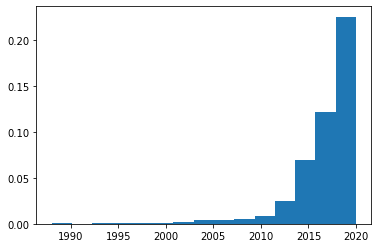

In [97]:
import matplotlib.pyplot as plt
plt.hist(perth_house_ml_df["YEAR_SOLD"], density= True, bins= 15)

In [98]:
perth_house_ml_df = perth_house_ml_df.loc[perth_house_df["YEAR_SOLD"] >= 2013, :]
perth_house_ml_df_cleaned = perth_house_ml_df.dropna().reset_index(drop= True)
perth_house_ml_df_cleaned

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,MONTH_SOLD,YEAR_SOLD,NEAREST_SCH_DIST,BUILDING_AGE
0,South Lake,565000,4,2,600,160,18300,1800,9,2018,0.828339,15.0
1,Wandi,365000,3,2,351,139,26900,4900,2,2019,5.524324,6.0
2,Camillo,287000,3,1,719,86,22600,1900,6,2015,1.649178,36.0
3,Bellevue,255000,2,1,651,59,17900,3600,7,2018,1.571401,65.0
4,Lockridge,325000,4,1,466,131,11200,2000,11,2016,1.514922,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29174,South Fremantle,1040000,4,3,292,245,16100,1500,3,2016,1.430350,3.0
29175,Westminster,410000,3,2,228,114,9600,4600,2,2017,1.679644,2.0
29176,Westminster,427000,3,2,261,112,9600,4600,2,2017,1.669159,1.0
29177,Girrawheen,295000,3,1,457,85,12600,4400,10,2016,0.358494,42.0


In [99]:
perth_house_ml_df_cleaned.to_csv("output/perth_housing_for_ML.csv", index= False)